In [2]:
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from imblearn.metrics import classification_report_imbalanced
import pandas as pd

df= pd.read_csv("PA_MV_B.csv", sep=',')
df = df.drop_duplicates(subset=['question'])
df.shape

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


(3999, 3)

In [518]:
df= df[df['truth']!=5]
df= df[df['result']!=5]


In [519]:
y_test= df['truth']
y_pred= df['result']

f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))

f-score: 0.8219109554777388
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.86      0.76      0.86      0.81      0.66      1257
          1       0.76      0.76      0.86      0.76      0.81      0.65       742

avg / total       0.82      0.82      0.80      0.82      0.81      0.66      1999



In [520]:
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))

f-score: 0.8219109554777388
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.86      0.76      0.86      0.81      0.66      1257
          1       0.76      0.76      0.86      0.76      0.81      0.65       742

avg / total       0.82      0.82      0.80      0.82      0.81      0.66      1999



In [521]:
y_test

0       1
1       0
2       1
3       0
4       0
       ..
1994    1
1995    0
1996    1
1997    1
1998    0
Name: truth, Length: 1999, dtype: int64

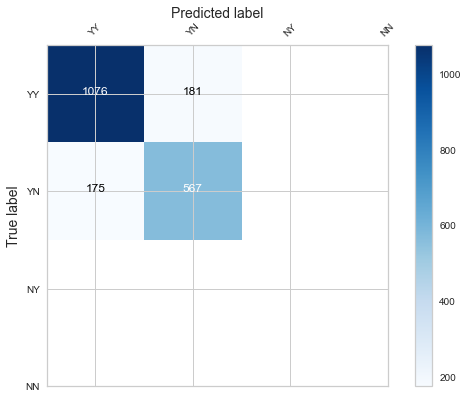

In [522]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np 


matrix = confusion_matrix(y_test,y_pred)
#class_names=['0','1']
class_names = ['YY', 'YN', 'NY', 'NN']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [523]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

result,0,1
truth,,
0,1076,181
1,175,567


In [524]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8048580528282505

Automatically created module for IPython interactive environment


/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


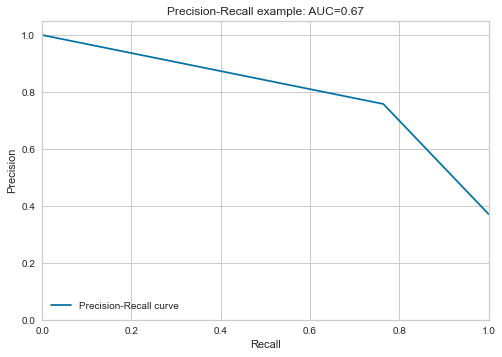

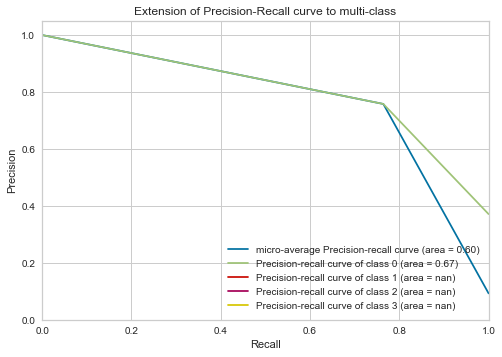

In [525]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
y_test = label_binarize(y_test, classes=[1, 2,3,4])
y_pred = label_binarize(y_pred, classes=[1, 2,3,4])
n_classes = 4



# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])
    

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")

  
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

In [526]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0]])

--------------------------

In [23]:
PAMVB= pd.read_csv("PA_MV.csv", sep=',')
PAMVB = PAMVB.drop_duplicates(subset=['question'])
PAMVB['RMV']= PAMVB['result']
PAMVB.shape

(3999, 4)

In [24]:
PAEMB= pd.read_csv("PA_EM.csv", sep=',')
PAEMB = PAEMB.drop_duplicates(subset=['question'])
PAEMB['REM']=PAEMB['result']
PAEMB.head()

,question,result,truth,REM
0,4,4,4,4
1,5cf83b7444578a0664cf472c,2,1,2
2,5cf83b8e44578a0664d35d68,1,1,1
3,5cf83ba344578a0664d67efb,4,4,4
4,5cf83bad44578a0664d8239a,2,2,2


In [25]:
PAGLADB= pd.read_csv("PA_GLAD.csv", sep=',')
PAGLADB = PAGLADB.drop_duplicates(subset=['question'])
PAGLADB['RGLAD']= PAGLADB['result']
PAGLADB.shape

(3999, 4)

In [26]:
PALFCB= pd.read_csv("PA_EM.csv", sep=',')
PALFCB = PALFCB.drop_duplicates(subset=['question'])
PALFCB['RLFC']= PALFCB['result']
PALFCB.shape

(3999, 4)

In [27]:
m1=pd.merge(PAMVB, PAEMB, on='question', how='inner')
m2=pd.merge(m1, PAGLADB, on='question', how='inner')
df=pd.merge(m2, PALFCB, on='question', how='inner')
df.shape

(3999, 13)

In [28]:
df.columns= ['question', 'result_x', 'truth_x', 'RMV', 'result_y', 'truth_y', 'REM',
       'result_x', 'truth', 'RGLAD', 'result_y', 'truth_y', 'RLFC']

In [29]:
df=df[['question', 'RMV',  'REM', 'RGLAD', 'RLFC', 'truth']]
df.head()

,question,RMV,REM,RGLAD,RLFC,truth
0,4,3,4,4,4,4
1,5cf83b7444578a0664cf472c,1,2,1,2,1
2,5cf83b8e44578a0664d35d68,1,1,1,1,1
3,5cf83ba344578a0664d67efb,4,4,4,4,4
4,5cf83bad44578a0664d8239a,2,2,2,2,2


In [30]:
  
df['AND']= df['RMV'] & df['REM'] & df['RGLAD'] & df['RLFC']

In [31]:
df['OR']= df['RMV'] | df['REM'] | df['RGLAD'] | df['RLFC']
df['hard']=0

In [32]:
df.loc[((df['AND']==1) & (df['truth']==0)) | ((df['OR']==0) & (df['truth']==1)) , 'hard'] = 1

In [33]:
df_hard= df[((df['AND']==1) & (df['truth']==0)) | ((df['OR']==0) & (df['truth']==1)) ]

In [34]:
df_hard.head()

,question,RMV,REM,RGLAD,RLFC,truth,AND,OR,hard


In [35]:
df_overlap= df[((df['AND']==1) ) | (df['OR']==0) ]

In [36]:
df_overlap.shape

(1246, 9)

In [37]:
df_easy=df[~df.question.isin(df_hard.question)]

In [38]:
y_test= df_easy['truth']
y_pred= df_easy['RMV']

f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))

f-score: 0.6874218554638659
                   pre       rec       spe        f1       geo       iba       sup

          1       0.83      0.74      0.91      0.78      0.82      0.66      1556
          2       0.52      0.49      0.93      0.50      0.67      0.43       571
          3       0.26      0.58      0.93      0.36      0.73      0.52       170
          4       0.74      0.72      0.81      0.73      0.76      0.58      1696
          5       0.03      0.33      0.99      0.06      0.57      0.31         6

avg / total       0.72      0.69      0.87      0.70      0.77      0.59      3999



In [39]:
df_easy.shape

(3999, 9)

In [40]:
df.to_csv("PA_hardIndex_Multi.csv", index=False)

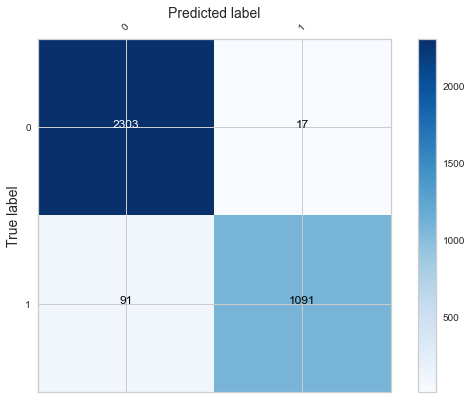

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np 


matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
#class_names = ['YY', 'YN', 'NY', 'NN']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [486]:
df_easy.to_csv('df_easy.csv', index=False)